# Sentiment Analysis ML Model

In [640]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go

In [641]:
import warnings
warnings.filterwarnings('ignore')

In [642]:
df = pd.read_csv('Email_Sentiment_Data.csv')

In [643]:
df = df.drop(['Email id'], axis = 1)

In [644]:
df.duplicated().sum()

np.int64(651)

In [645]:
df = df.drop_duplicates()

In [646]:
df.isnull().sum()

From Name            0
From seniority       0
From Department      0
To Name              0
To seniority         0
To Department        0
Email topic          0
Date                 0
Sentiment            0
Is opened?           0
Device               0
Within work hours    0
Within workdays      0
dtype: int64

In [647]:
df_new = df[['Email topic', 'Sentiment']]

In [648]:
df_new

Email topic Sentiment
0                           Holiday schedule confirmed.   neutral
1     Like a withered rose in the garden of love, pe...  positive
2          Helplessness sinks in as challenges pile up.   neutral
3                                    Training Thursday.   neutral
4                   Reflecting on the beauty of nature.   neutral
...                                                 ...       ...
1459                      Great job on client contract!  positive
1463    Sending affectionate vibes to all my followers!  positive
1468                    Operational efficiency success!  positive
1478                     Delighted with system upgrade!  positive
1481  Loneliness, a silent companion in the night, t...  positive

[849 rows x 2 columns]

# Text cleaning or pre-processing

In [649]:
def clean_text(text):
    text = text.lower() 
    return text.strip()

In [650]:
df_new['Email topic'] = df_new['Email topic'].apply(lambda x: clean_text(x))

In [651]:
df_new['Email topic']

0                             holiday schedule confirmed.
1       like a withered rose in the garden of love, pe...
2            helplessness sinks in as challenges pile up.
3                                      training thursday.
4                     reflecting on the beauty of nature.
                              ...                        
1459                        great job on client contract!
1463      sending affectionate vibes to all my followers!
1468                      operational efficiency success!
1478                       delighted with system upgrade!
1481    loneliness, a silent companion in the night, t...
Name: Email topic, Length: 849, dtype: object

In [652]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [653]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [654]:
df_new['Email topic']= df_new['Email topic'].apply(lambda x:remove_punctuation(x))

In [655]:
df_new['Email topic']

0                              holiday schedule confirmed
1       like a withered rose in the garden of love pet...
2             helplessness sinks in as challenges pile up
3                                       training thursday
4                      reflecting on the beauty of nature
                              ...                        
1459                         great job on client contract
1463       sending affectionate vibes to all my followers
1468                       operational efficiency success
1478                        delighted with system upgrade
1481    loneliness a silent companion in the night the...
Name: Email topic, Length: 849, dtype: object

In [656]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [657]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [658]:
import re
import nltk
from wordcloud import WordCloud

In [659]:
stopwords = nltk.corpus.stopwords.words('english')

In [660]:
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [661]:
def remove_stopwords(text):
    output = " ".join(i for i in text.split() if i not in stopwords)
    return output

df_new['Email topic'] = df_new['Email topic'].apply(lambda x: remove_stopwords(x))

In [662]:
df_new['Email topic']

0                              holiday schedule confirmed
1       like withered rose garden love petals fall sil...
2                      helplessness sinks challenges pile
3                                       training thursday
4                                reflecting beauty nature
                              ...                        
1459                            great job client contract
1463                 sending affectionate vibes followers
1468                       operational efficiency success
1478                             delighted system upgrade
1481    loneliness silent companion night echo chamber...
Name: Email topic, Length: 849, dtype: object

In [663]:
from nltk.stem import WordNetLemmatizer

In [664]:
wordnet_lemmatizer = WordNetLemmatizer()

In [665]:
def lemmatizer_new(text):
    lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word, pos = 'v') for word in text.split()])
    return lemm_text

In [666]:
df_new['Email topic']=df_new['Email topic'].apply(lambda x:lemmatizer_new(x))

In [667]:
df_new['Email topic']

0                                holiday schedule confirm
1       like wither rise garden love petals fall silen...
2                        helplessness sink challenge pile
3                                          train thursday
4                                   reflect beauty nature
                              ...                        
1459                            great job client contract
1463                    send affectionate vibes followers
1468                       operational efficiency success
1478                               delight system upgrade
1481    loneliness silent companion night echo chamber...
Name: Email topic, Length: 849, dtype: object

In [668]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [669]:
df_new['Email topic'] = df_new['Email topic'].apply(lambda x: clean_text(x))

In [670]:
df_new['Email topic']

0                                holiday schedule confirm
1       like wither rise garden love petals fall silen...
2                        helplessness sink challenge pile
3                                          train thursday
4                                   reflect beauty nature
                              ...                        
1459                            great job client contract
1463                    send affectionate vibes followers
1468                       operational efficiency success
1478                               delight system upgrade
1481    loneliness silent companion night echo chamber...
Name: Email topic, Length: 849, dtype: object

In [671]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [672]:
df_new['Email topic'] = df_new['Email topic'].apply(lambda x: remove_digits(x))

In [673]:
df_new['Email topic']

0                                holiday schedule confirm
1       like wither rise garden love petals fall silen...
2                        helplessness sink challenge pile
3                                          train thursday
4                                   reflect beauty nature
                              ...                        
1459                            great job client contract
1463                    send affectionate vibes followers
1468                       operational efficiency success
1478                               delight system upgrade
1481    loneliness silent companion night echo chamber...
Name: Email topic, Length: 849, dtype: object

In [674]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [675]:
df_new['Email topic'] = df_new['Email topic'].apply(lambda x: remove_emojis(x))

In [676]:
df_new['Email topic']

0                                holiday schedule confirm
1       like wither rise garden love petals fall silen...
2                        helplessness sink challenge pile
3                                          train thursday
4                                   reflect beauty nature
                              ...                        
1459                            great job client contract
1463                    send affectionate vibes followers
1468                       operational efficiency success
1478                               delight system upgrade
1481    loneliness silent companion night echo chamber...
Name: Email topic, Length: 849, dtype: object

In [677]:
df_new['Email topic'] = df_new['Email topic'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

In [678]:
df_new['Email topic']

0                                holiday schedule confirm
1       like wither rise garden love petals fall silen...
2                        helplessness sink challenge pile
3                                          train thursday
4                                   reflect beauty nature
                              ...                        
1459                            great job client contract
1463                    send affectionate vibes followers
1468                       operational efficiency success
1478                               delight system upgrade
1481    loneliness silent companion night echo chamber...
Name: Email topic, Length: 849, dtype: object

In [679]:
df_new['Email topic'] = df_new['Email topic'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [680]:
df_new['Email topic']

0                                holiday schedule confirm
1       like wither rise garden love petals fall silen...
2                        helplessness sink challenge pile
3                                          train thursday
4                                   reflect beauty nature
                              ...                        
1459                            great job client contract
1463                    send affectionate vibes followers
1468                       operational efficiency success
1478                               delight system upgrade
1481    loneliness silent companion night echo chamber...
Name: Email topic, Length: 849, dtype: object

In [681]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [682]:
df_new['Email topic'] = df_new['Email topic'].apply(lambda x: remove_urls(x))

In [683]:
df_new['Email topic'] 

0                                holiday schedule confirm
1       like wither rise garden love petals fall silen...
2                        helplessness sink challenge pile
3                                          train thursday
4                                   reflect beauty nature
                              ...                        
1459                            great job client contract
1463                    send affectionate vibes followers
1468                       operational efficiency success
1478                               delight system upgrade
1481    loneliness silent companion night echo chamber...
Name: Email topic, Length: 849, dtype: object

In [684]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [685]:
sia = SentimentIntensityAnalyzer()

In [686]:
df_new['sentiment'] = df_new['Email topic'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [687]:
df_new

Email topic Sentiment  sentiment
0                              holiday schedule confirm   neutral     0.4019
1     like wither rise garden love petals fall silen...  positive     0.7717
2                      helplessness sink challenge pile   neutral    -0.4215
3                                        train thursday   neutral     0.0000
4                                 reflect beauty nature   neutral     0.5859
...                                                 ...       ...        ...
1459                          great job client contract  positive     0.6249
1463                  send affectionate vibes followers  positive     0.4404
1468                     operational efficiency success  positive     0.7351
1478                             delight system upgrade  positive     0.5994
1481  loneliness silent companion night echo chamber...  positive    -0.4215

[849 rows x 3 columns]

In [688]:
df_new['sentiment_category'] = df_new['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [689]:
df_new

Email topic Sentiment  sentiment  \
0                              holiday schedule confirm   neutral     0.4019   
1     like wither rise garden love petals fall silen...  positive     0.7717   
2                      helplessness sink challenge pile   neutral    -0.4215   
3                                        train thursday   neutral     0.0000   
4                                 reflect beauty nature   neutral     0.5859   
...                                                 ...       ...        ...   
1459                          great job client contract  positive     0.6249   
1463                  send affectionate vibes followers  positive     0.4404   
1468                     operational efficiency success  positive     0.7351   
1478                             delight system upgrade  positive     0.5994   
1481  loneliness silent companion night echo chamber...  positive    -0.4215   

     sentiment_category  
0              Positive  
1              Positive  
2              Negative  
3               Neutral  
4              Positive  
...                 ...  
1459           Positive  
1463           Positive  
1468           Positive  
1478           Positive  
1481           Negative  

[849 rows x 4 columns]

In [690]:
df = df_new[['Email topic', 'sentiment_category']]

In [691]:
label_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
df['sentiment_category'] = df['sentiment_category'].map(label_mapping)

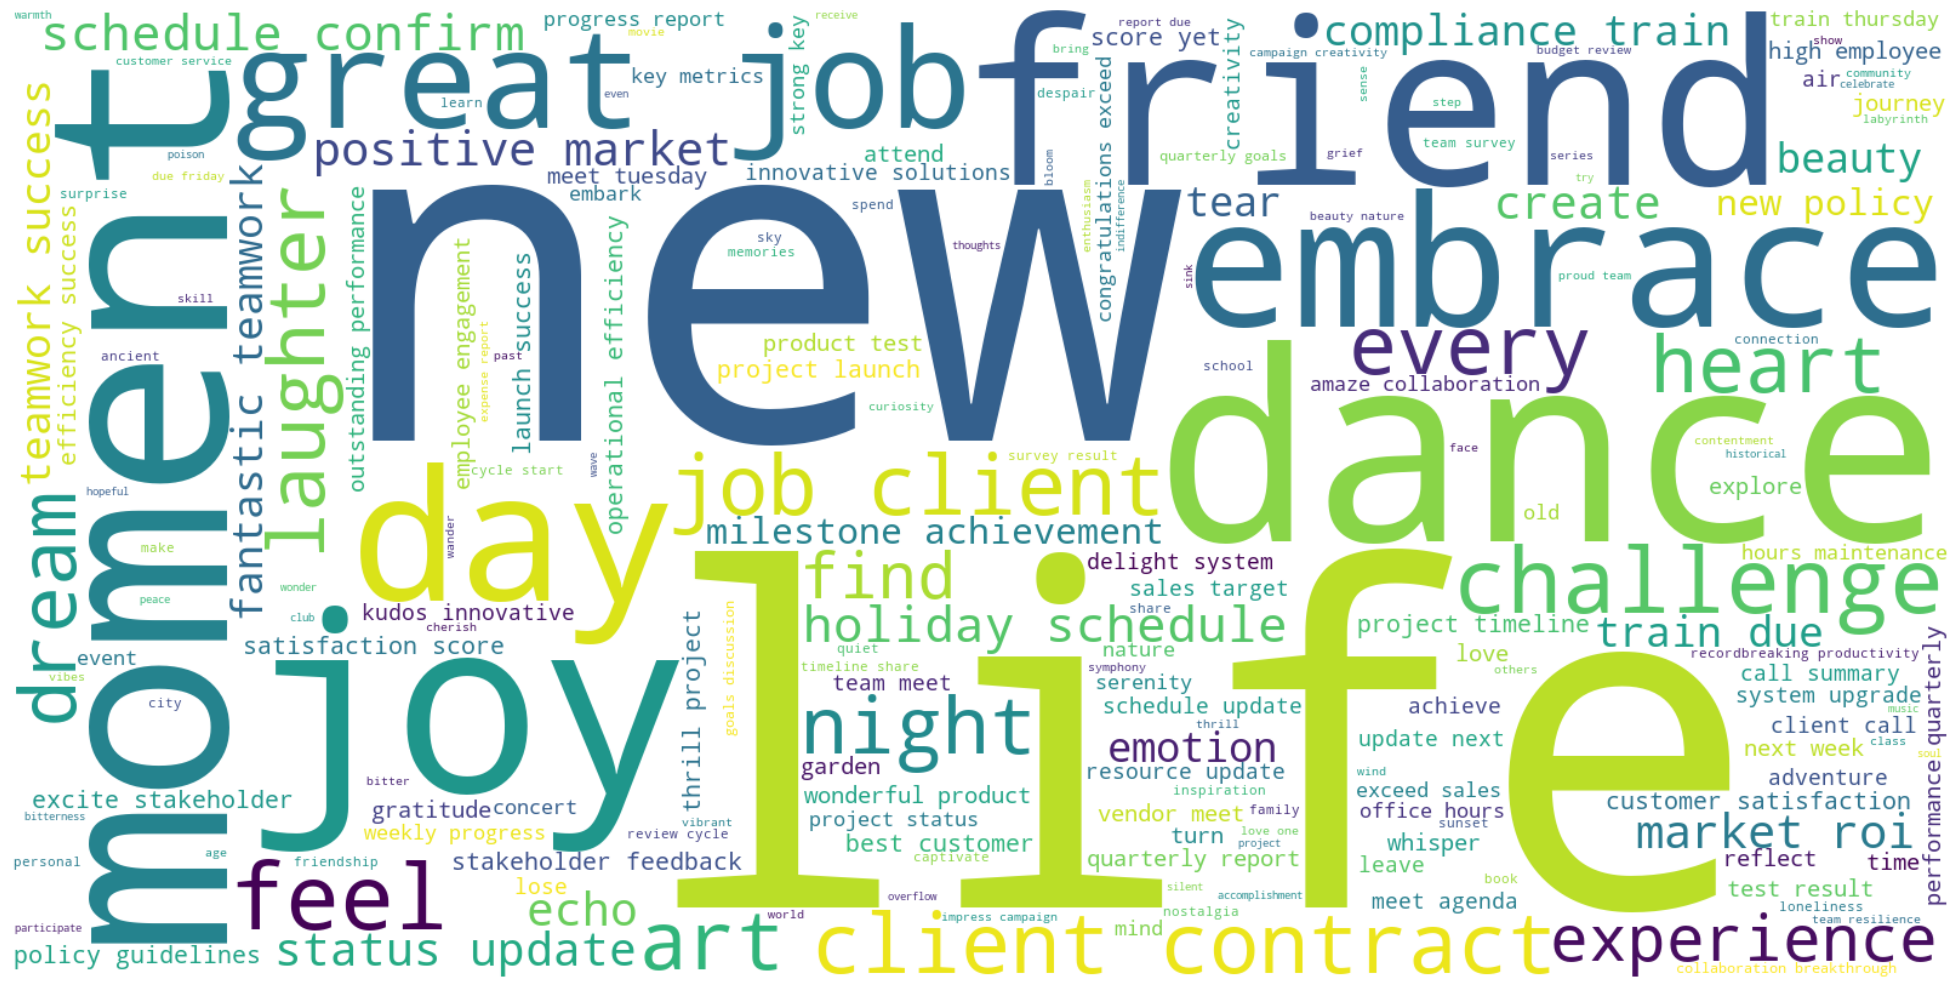

In [692]:
wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(df['Email topic']))
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

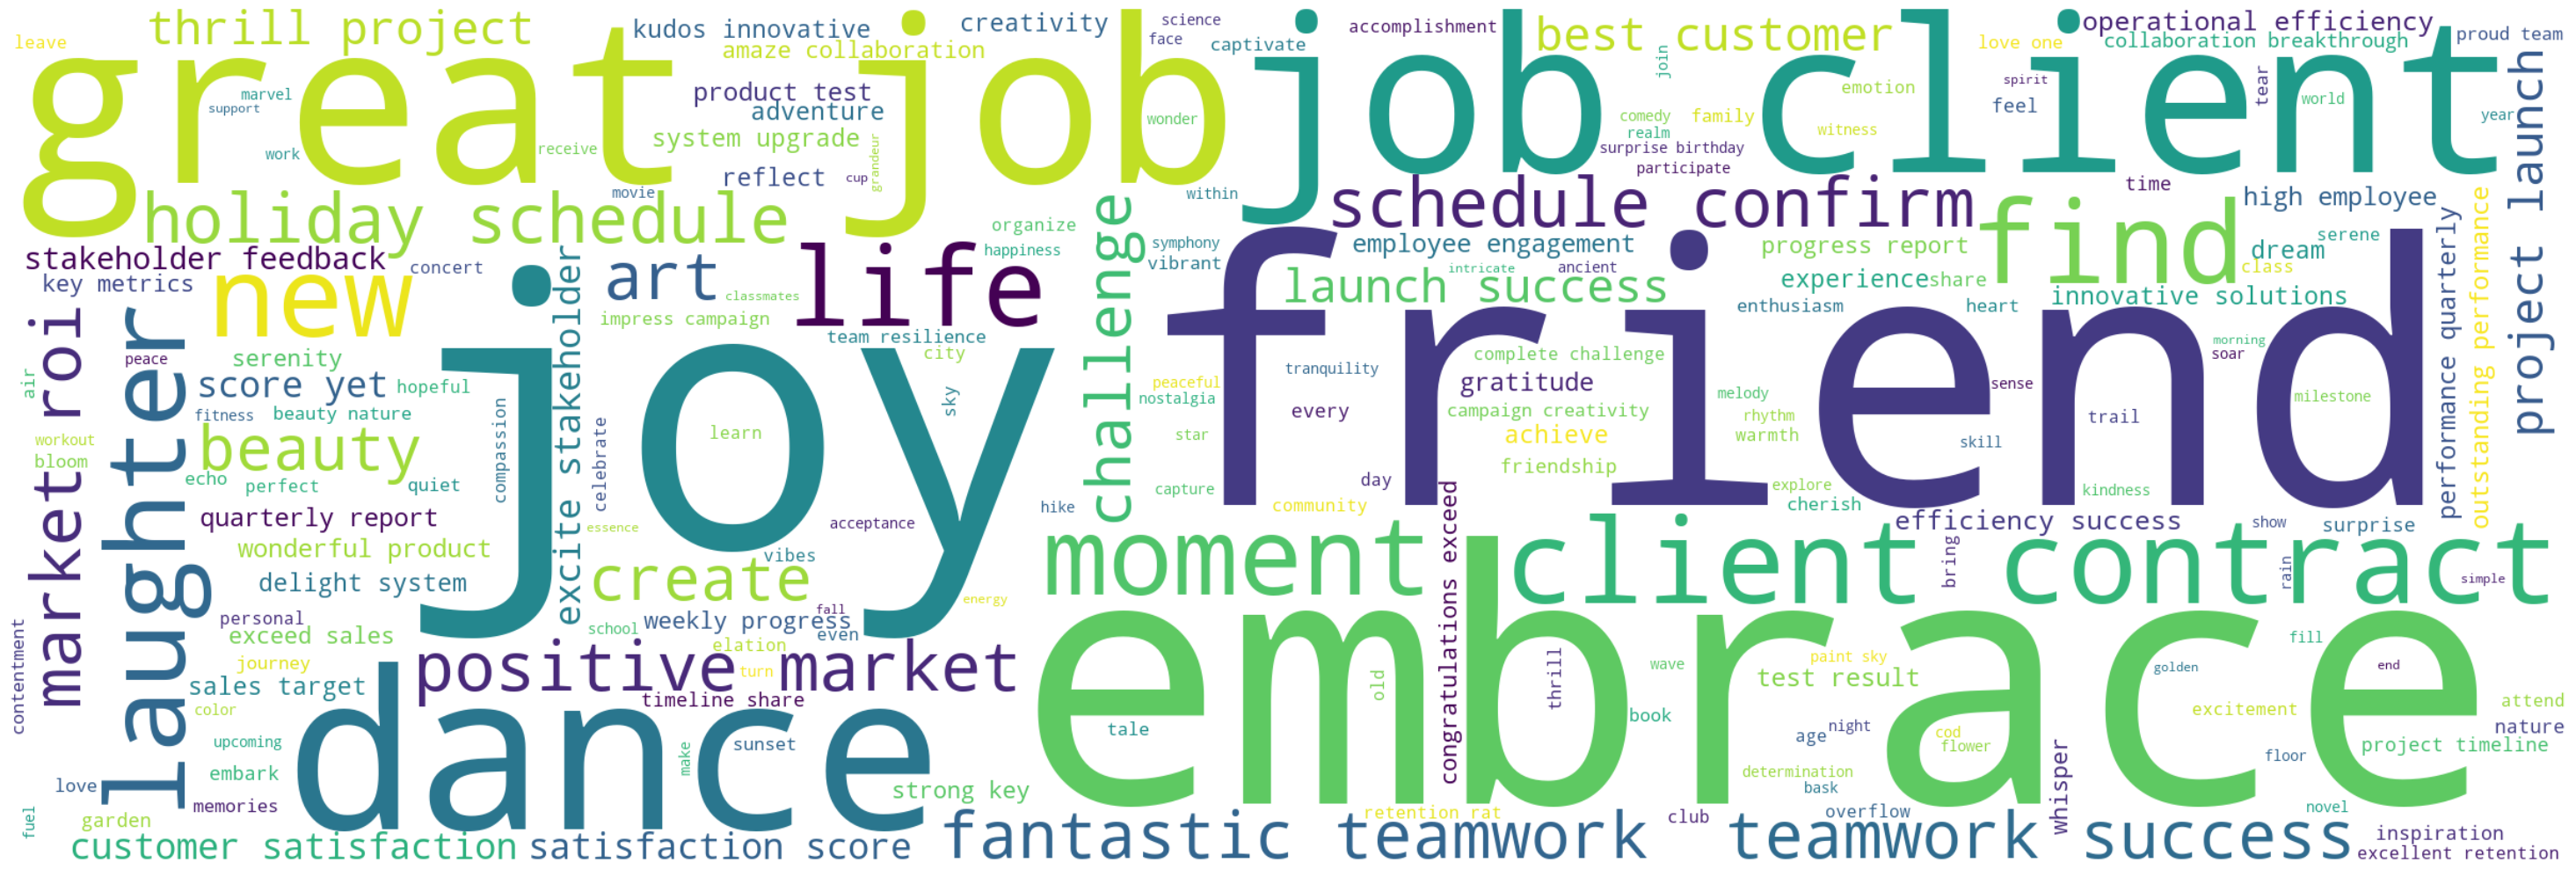

In [693]:
positive_text = ' '.join(df.loc[df['sentiment_category'] == 1, 'Email topic'])

if positive_text.strip():
    wordcloud = WordCloud(background_color='white', width=2400, height=800).generate(positive_text)
    plt.figure(figsize=(30, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print('No positive text data available for word cloud generation.')

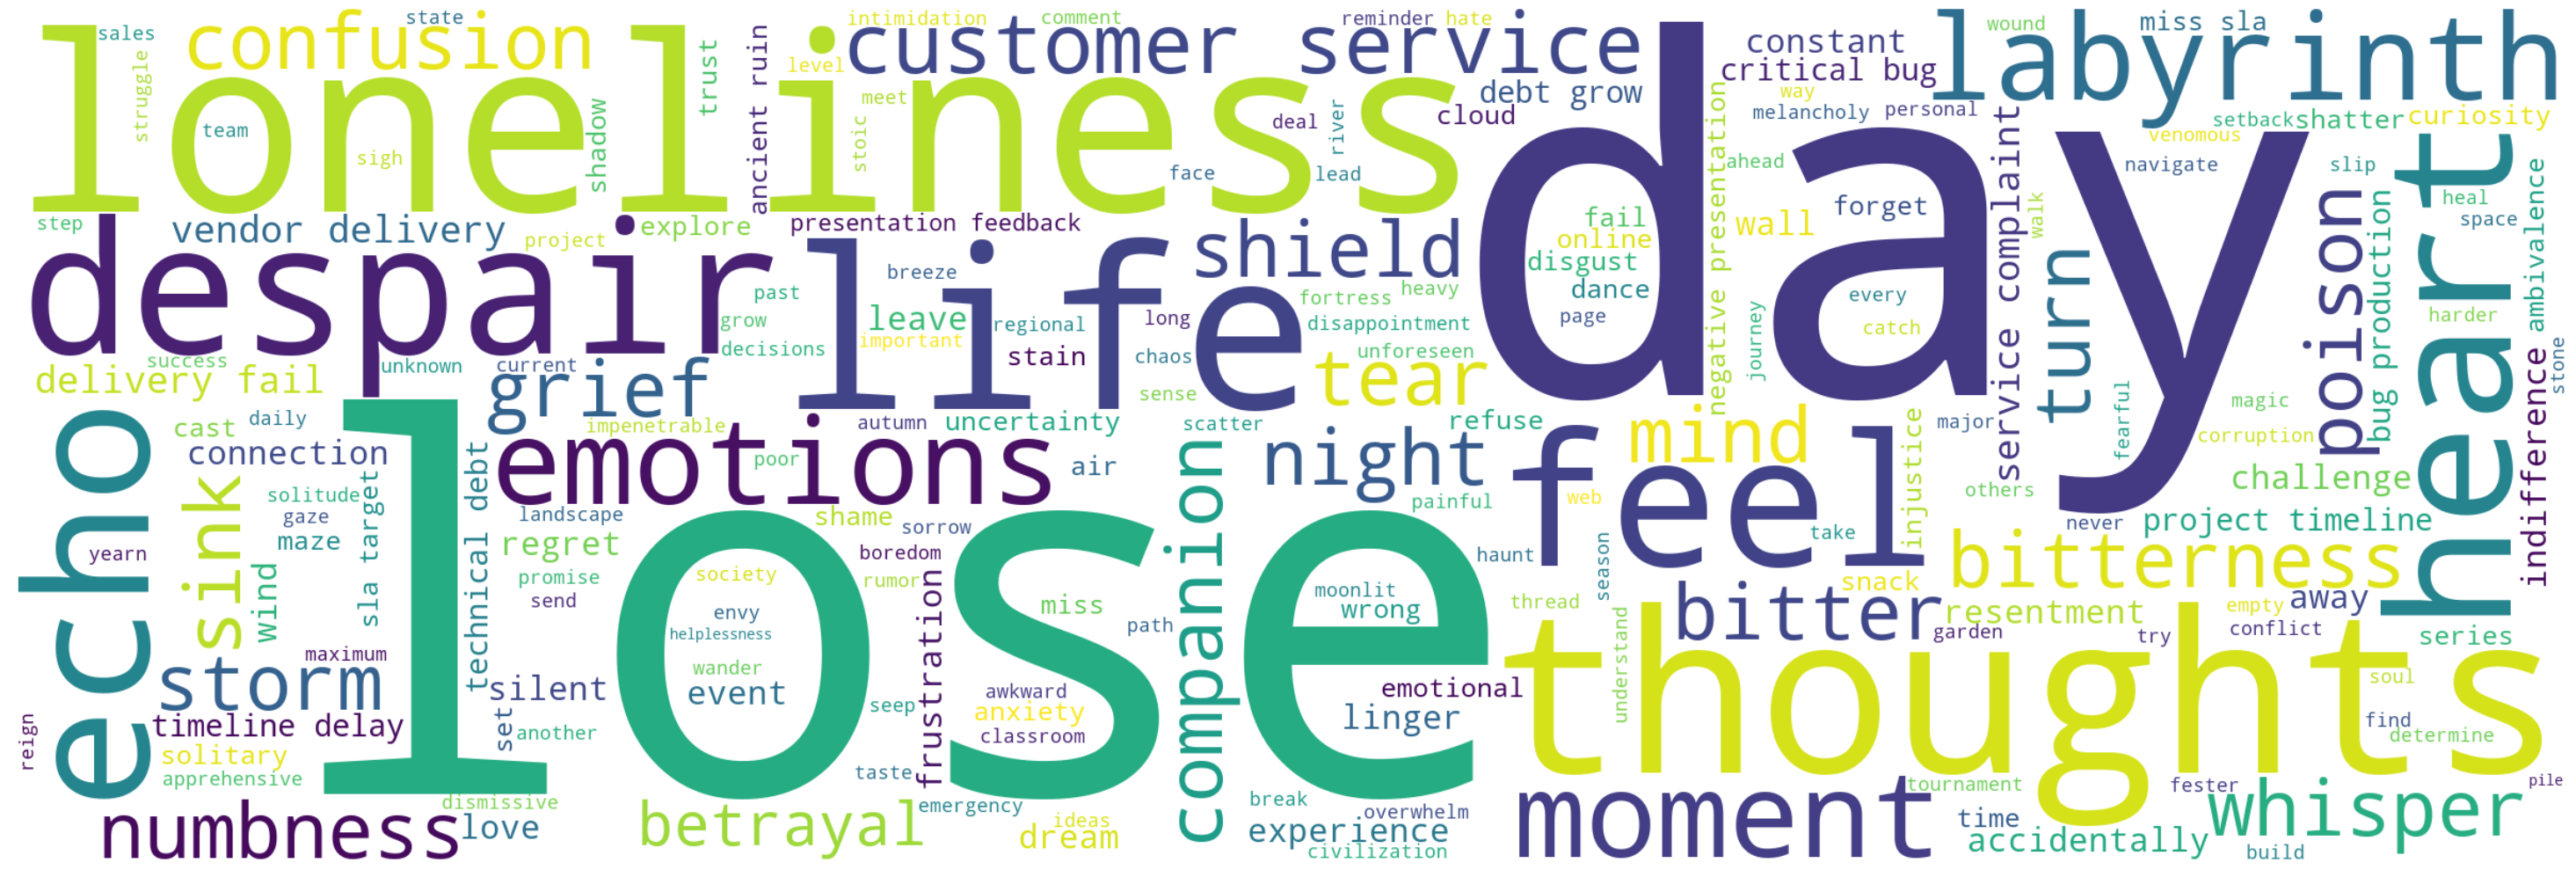

In [694]:
negative_text = ' '.join(df.loc[df['sentiment_category'] == -1, 'Email topic'])

if positive_text.strip():
    wordcloud = WordCloud(background_color='white', width=2400, height=800).generate(negative_text)
    plt.figure(figsize=(30, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print('No negative text data available for word cloud generation.')

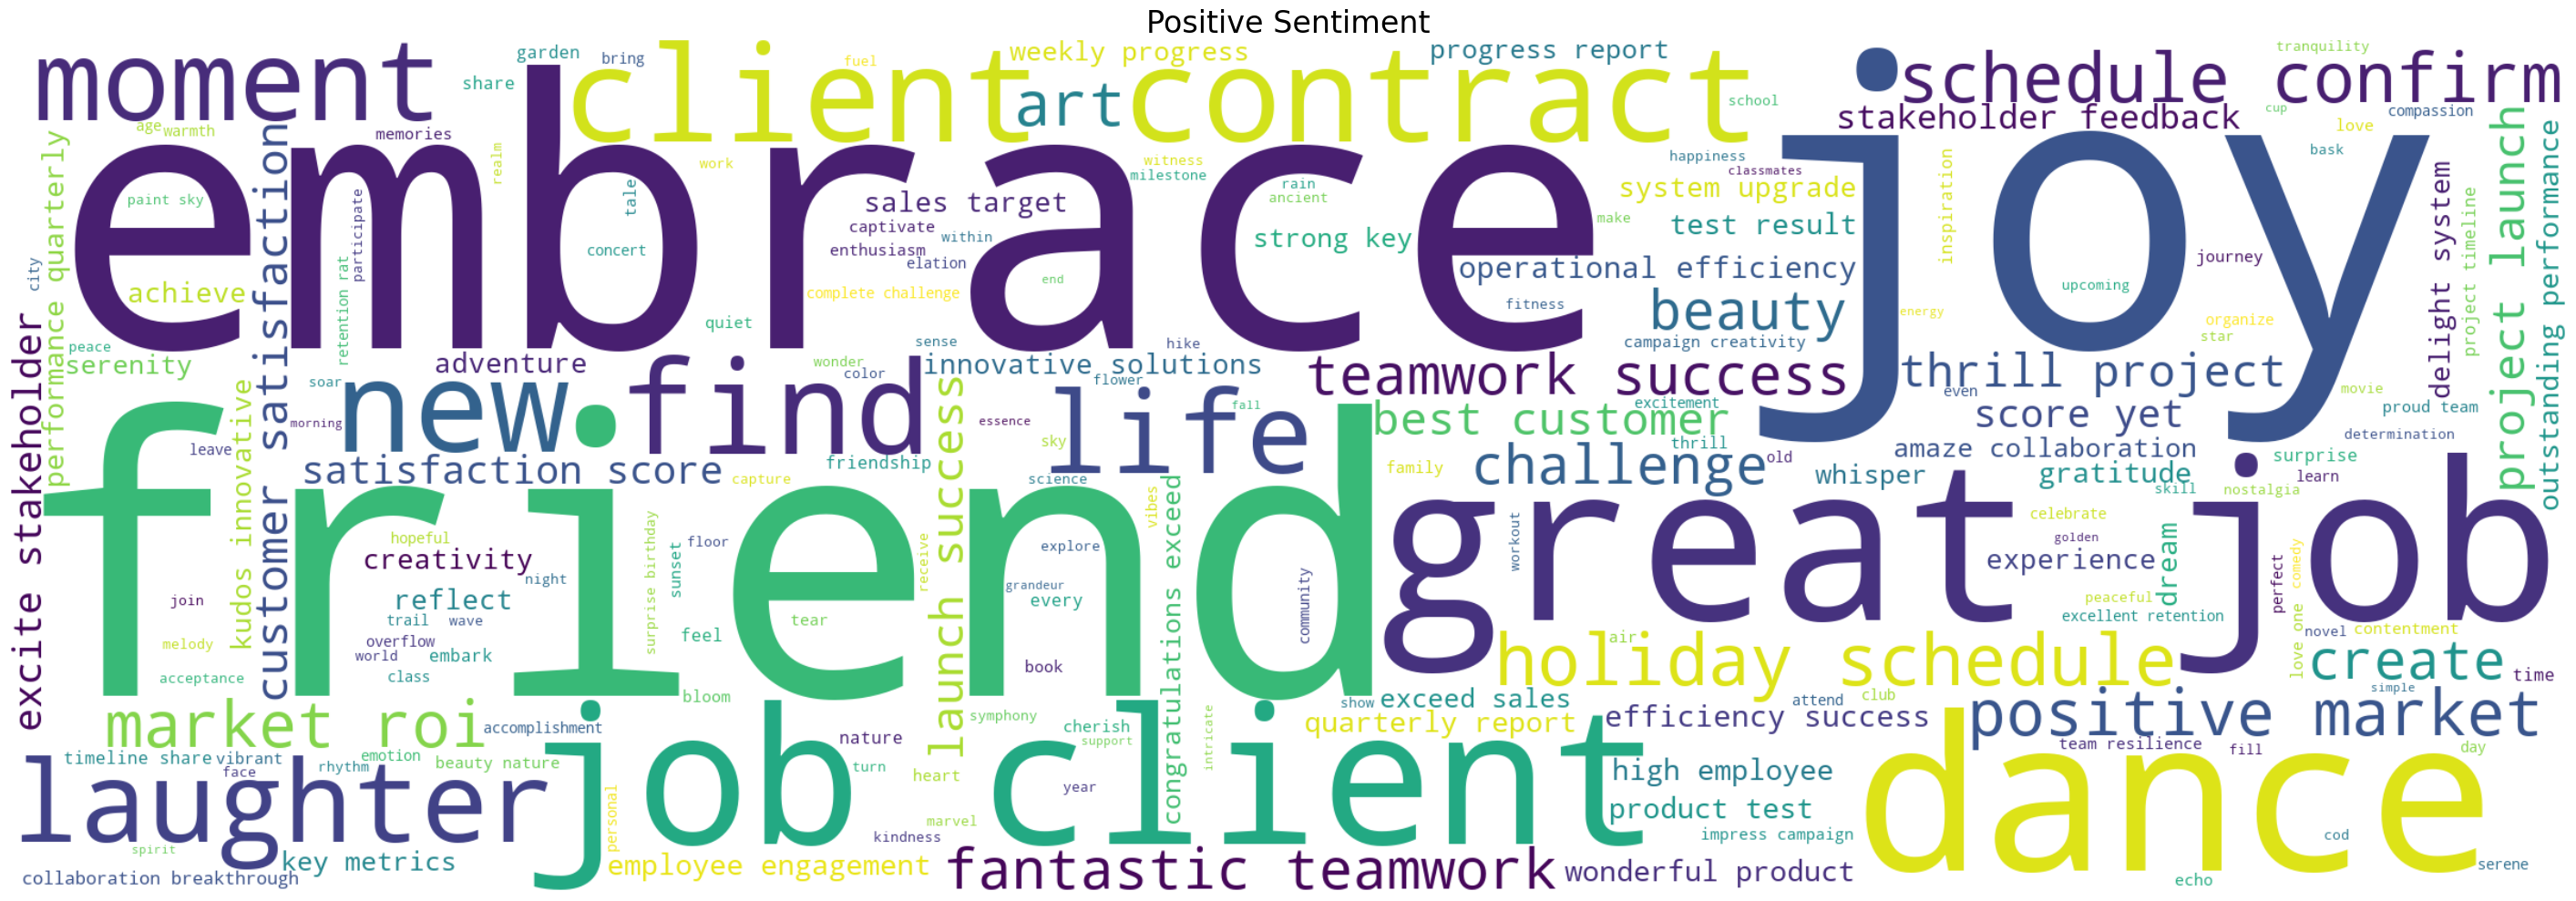

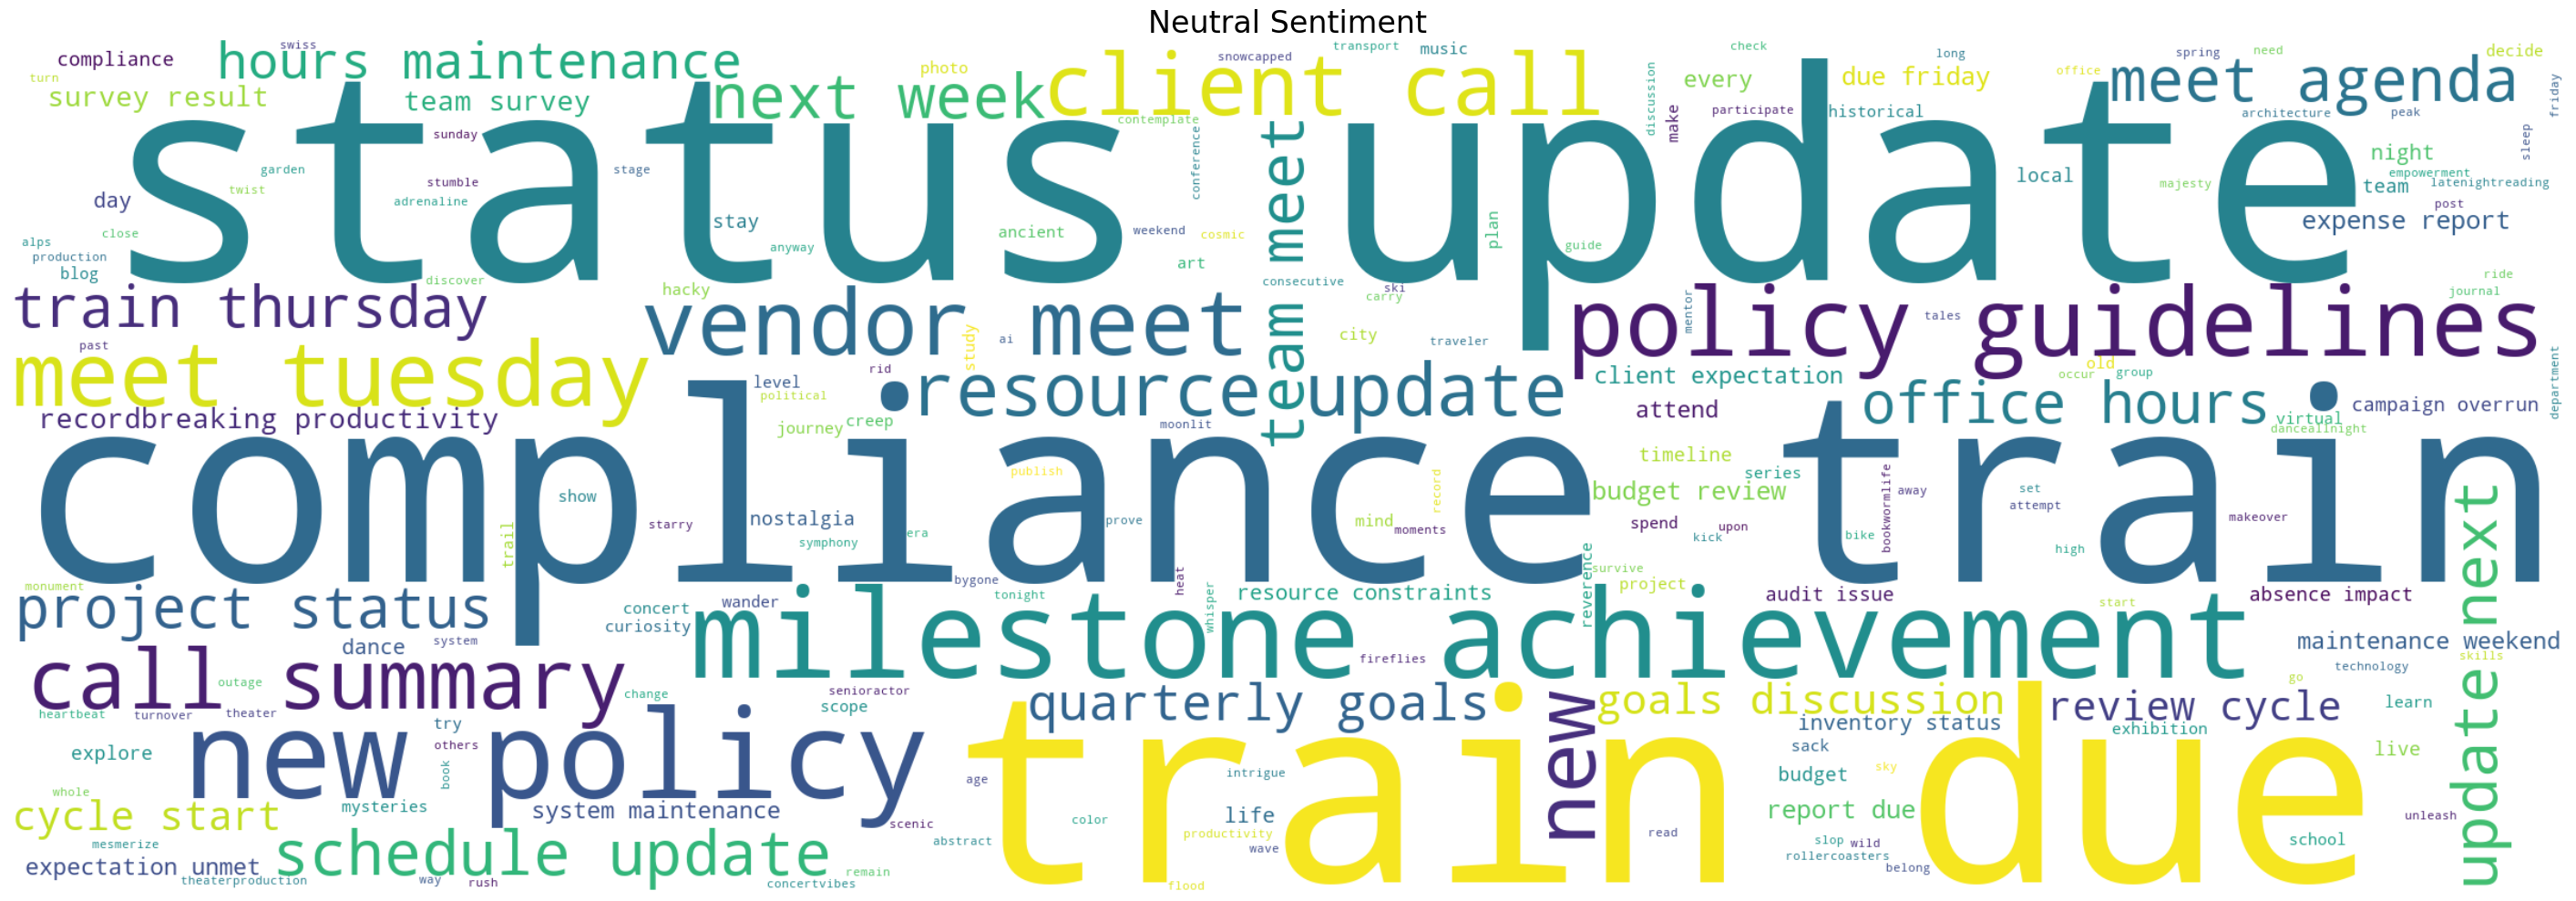

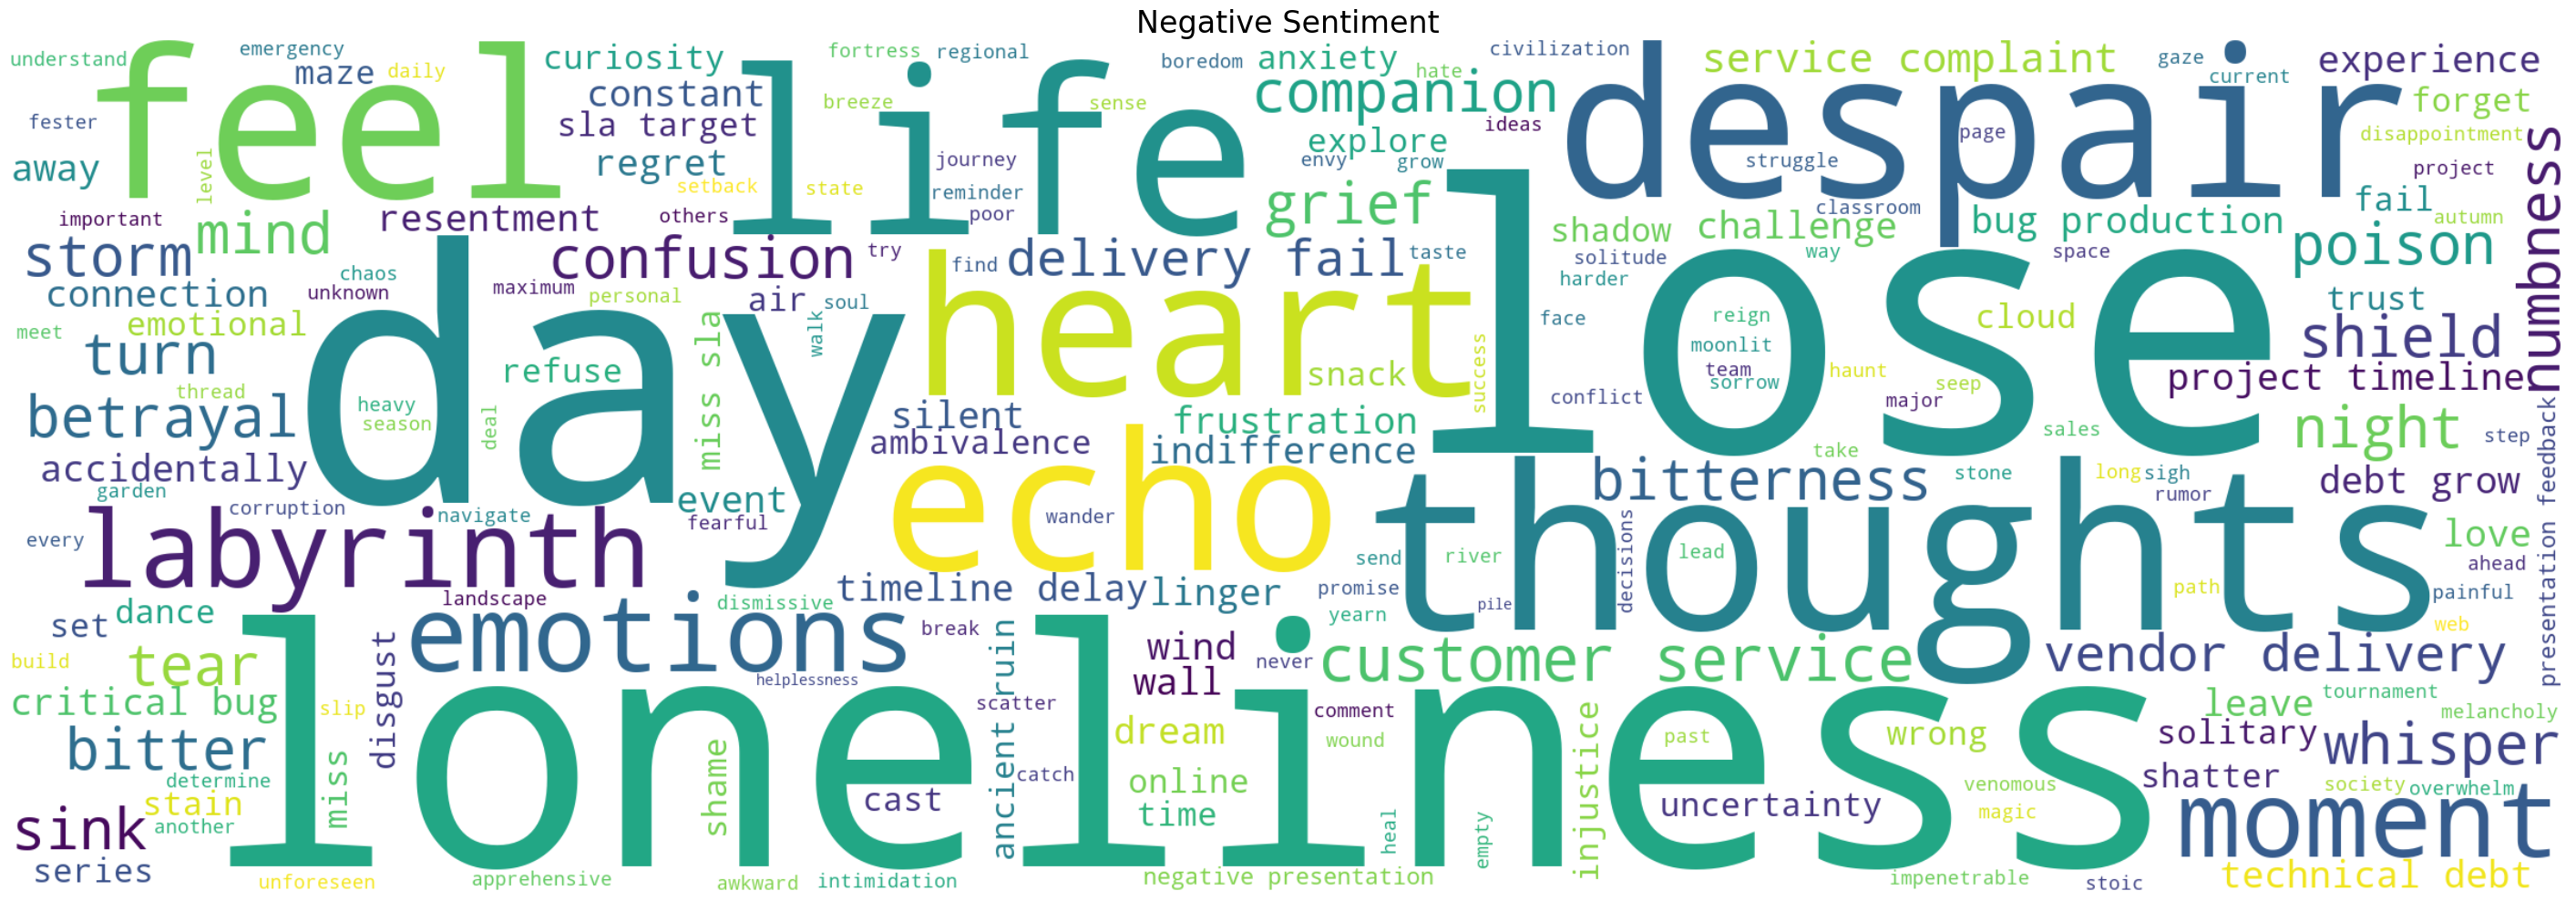

In [695]:
def generate_wordcloud_for_sentiment(sentiment_value, title):
    text = ' '.join(df.loc[df['sentiment_category'] == sentiment_value, 'Email topic']).strip()
    if text:
        wordcloud = WordCloud(background_color='white', width=2400, height=800).generate(text)
        plt.figure(figsize=(30, 10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=24)
        plt.tight_layout()
        plt.show()
    else:
        print(f'No text data available for sentiment: {title}')

generate_wordcloud_for_sentiment(1, 'Positive Sentiment')
generate_wordcloud_for_sentiment(0, 'Neutral Sentiment')
generate_wordcloud_for_sentiment(-1, 'Negative Sentiment')

In [696]:
df

Email topic  sentiment_category
0                              holiday schedule confirm                   1
1     like wither rise garden love petals fall silen...                   1
2                      helplessness sink challenge pile                  -1
3                                        train thursday                   0
4                                 reflect beauty nature                   1
...                                                 ...                 ...
1459                          great job client contract                   1
1463                  send affectionate vibes followers                   1
1468                     operational efficiency success                   1
1478                             delight system upgrade                   1
1481  loneliness silent companion night echo chamber...                  -1

[849 rows x 2 columns]

In [697]:
df['sentiment_category'].value_counts()

sentiment_category
 1    479
 0    222
-1    148
Name: count, dtype: int64

In [698]:
from sklearn.utils import resample

df_pos = df[df['sentiment_category'] == 1]
df_neg = df[df['sentiment_category'] == -1]
df_neu = df[df['sentiment_category'] == 0]

max_count = df['sentiment_category'].value_counts().max()

df_neg_upsampled = resample(df_neg, replace=True, n_samples=max_count, random_state=42)
df_neu_upsampled = resample(df_neu, replace=True, n_samples=max_count, random_state=42)

df_balanced = pd.concat([df_pos, df_neg_upsampled, df_neu_upsampled])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [699]:
df_balanced['sentiment_category'].value_counts()

sentiment_category
-1    479
 0    479
 1    479
Name: count, dtype: int64

In [700]:
df_balanced.columns

Index(['Email topic', 'sentiment_category'], dtype='object')

In [701]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df_balanced['Email topic'])
y = df_balanced['sentiment_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9479166666666666

Confusion Matrix:
 [[93  0  3]
 [ 0 92  4]
 [ 7  1 88]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.93      0.97      0.95        96
           0       0.99      0.96      0.97        96
           1       0.93      0.92      0.92        96

    accuracy                           0.95       288
   macro avg       0.95      0.95      0.95       288
weighted avg       0.95      0.95      0.95       288



In [702]:
from sklearn.tree import DecisionTreeClassifier

In [703]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9340277777777778

Confusion Matrix:
 [[91  0  5]
 [ 0 95  1]
 [11  2 83]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.89      0.95      0.92        96
           0       0.98      0.99      0.98        96
           1       0.93      0.86      0.90        96

    accuracy                           0.93       288
   macro avg       0.93      0.93      0.93       288
weighted avg       0.93      0.93      0.93       288



In [704]:
from sklearn.ensemble import RandomForestClassifier

In [705]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9409722222222222

Confusion Matrix:
 [[90  0  6]
 [ 2 91  3]
 [ 5  1 90]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.93      0.94      0.93        96
           0       0.99      0.95      0.97        96
           1       0.91      0.94      0.92        96

    accuracy                           0.94       288
   macro avg       0.94      0.94      0.94       288
weighted avg       0.94      0.94      0.94       288



In [706]:
from sklearn.naive_bayes import MultinomialNB

In [707]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9444444444444444

Confusion Matrix:
 [[96  0  0]
 [ 0 95  1]
 [12  3 81]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.89      1.00      0.94        96
           0       0.97      0.99      0.98        96
           1       0.99      0.84      0.91        96

    accuracy                           0.94       288
   macro avg       0.95      0.94      0.94       288
weighted avg       0.95      0.94      0.94       288



In [708]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9652777777777778

Confusion Matrix:
 [[95  0  1]
 [ 0 93  3]
 [ 5  1 90]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.99      0.97        96
           0       0.99      0.97      0.98        96
           1       0.96      0.94      0.95        96

    accuracy                           0.97       288
   macro avg       0.97      0.97      0.97       288
weighted avg       0.97      0.97      0.97       288



In [709]:
from sklearn.neural_network import MLPClassifier

In [710]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9548611111111112

Confusion Matrix:
 [[95  0  1]
 [ 0 93  3]
 [ 6  3 87]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.99      0.96        96
           0       0.97      0.97      0.97        96
           1       0.96      0.91      0.93        96

    accuracy                           0.95       288
   macro avg       0.96      0.95      0.95       288
weighted avg       0.96      0.95      0.95       288



Unique labels in y (before mapping): [-1  0  1]
Unique labels in y (after mapping): [0 1 2]
X_train shape: (1149, 1623), dtype: float64
X_test shape: (288, 1623), dtype: float64
y_train shape: (1149,), dtype: int32
y_test shape: (288,), dtype: int32
Unique labels in y_train: [0 1 2]
Unique labels in y_test: [0 1 2]


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │       207,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,323 (845.01 KB)

 Trainable params: 216,323 (845.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4440 - loss: 1.0828 - val_accuracy: 0.8522 - val_loss: 1.0489
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8444 - loss: 0.9769 - val_accuracy: 0.8957 - val_loss: 0.8663
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9325 - loss: 0.6427 - val_accuracy: 0.9565 - val_loss: 0.4400
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9782 - loss: 0.2358 - val_accuracy: 0.9739 - val_loss: 0.1954
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9924 - loss: 0.0738 - val_accuracy: 0.9652 - val_loss: 0.1341
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0305 - val_accuracy: 0.9652 - val_loss: 0.1147
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0196 - val_accuracy: 0.9652 - val_loss: 0.1101
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 0.9609 - val_loss:

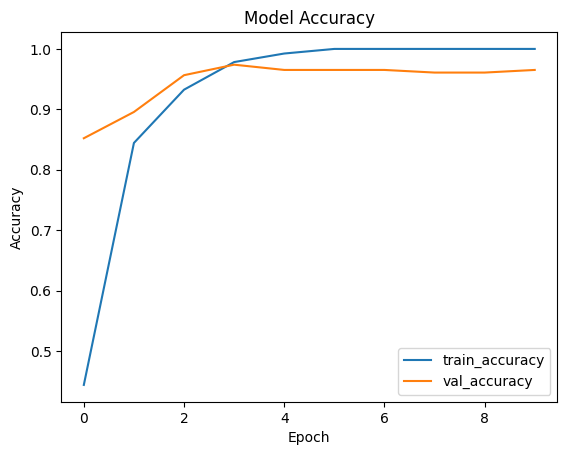

In [711]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

try:
    assert 'df_balanced' in globals(), "df_balanced DataFrame is not defined"
except AssertionError as e:
    print(e)
    raise

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df_balanced['Email topic']).toarray()
y = df_balanced['sentiment_category']

print("Unique labels in y (before mapping):", np.unique(y))

label_mapping = {-1: 0, 0: 1, 1: 2}
if y.dtype == 'object' or isinstance(y.iloc[0], str):
    y = y.map(label_mapping)
else:
    y = y.replace(label_mapping)  
y = y.astype(np.int32)  

print("Unique labels in y (after mapping):", np.unique(y))

assert not np.any(np.isnan(X)), "X contains NaN values"
assert not np.any(np.isinf(X)), "X contains infinite values"
assert not np.any(np.isnan(y)), "y contains NaN values"
assert not np.any(np.isinf(y)), "y contains infinite values"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtype}")
print(f"X_test shape: {X_test.shape}, dtype: {X_test.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))

assert np.all((y_train >= 0) & (y_train <= 2)), "y_train contains invalid labels"
assert np.all((y_test >= 0) & (y_test <= 2)), "y_test contains invalid labels"

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

y_pred = model.predict(X_test, batch_size=32)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nAccuracy:", accuracy_score(y_test, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes, target_names=['negative', 'neutral', 'positive']))

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [712]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle

# Use 'sentiment_category' as the target
target = 'sentiment_category'
features = ['Email topic']  # Only the text column

# Convert text to features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df[features[0]])
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Save model and vectorizer
with open('senti_logreg_model.pkl', 'wb') as file:
    pickle.dump({'model': logreg, 'vectorizer': tfidf}, file)

print("Model and vectorizer saved as senti_logreg_model.pkl")

Model and vectorizer saved as senti_logreg_model.pkl
